<a href="https://colab.research.google.com/github/gpasxos/large-scale-optimization/blob/main/ch03_duality_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<>:38: SyntaxWarning: invalid escape sequence '\l'
<>:38: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipython-input-1115949614.py:38: SyntaxWarning: invalid escape sequence '\l'
  ax1.axvline(x=1, color='r', linestyle='--', label='Constraint $x \leq 1$')


Primal optimal: x* = 0.9990, f* = -2.4980
Dual optimal: lambda* = 1.0010, d* = -2.0000
Duality gap: -0.497997


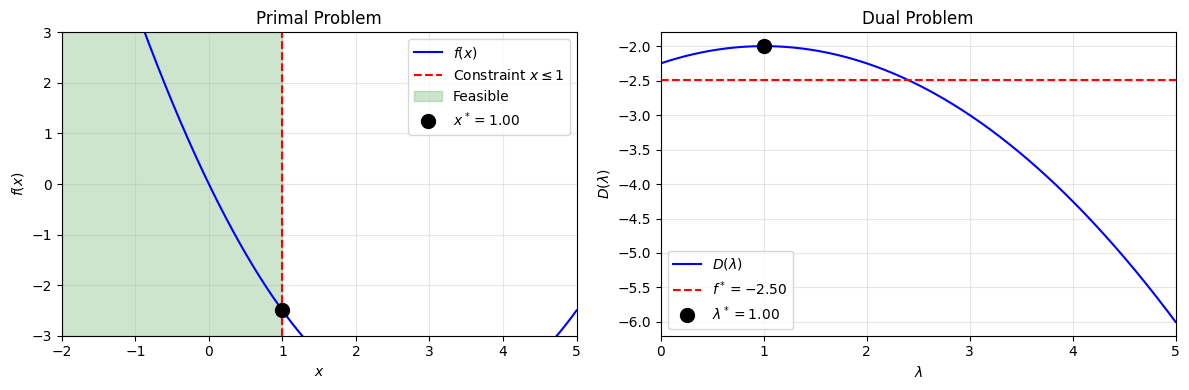

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Primal: min 0.5*x^2 - 3*x s.t. x <= 1
# Dual: max D(lambda) = -0.5*(A^T*lambda + c)^2/Q - b*lambda
# = -0.5*(lambda - 3)^2 / 2 - lambda

def primal_objective(x):
    return 0.5 * x**2 - 3*x

def dual_function(lam):
    # D(lambda) = -0.5*(lambda - 3)^2 / 2 - lambda
    return -0.5 * (lam - 3)**2 / 2 - lam

# Solve primal by enumeration
x_vals = np.linspace(-2, 5, 1000)
x_feasible = x_vals[x_vals <= 1]
primal_vals = primal_objective(x_feasible)
x_opt = x_feasible[np.argmin(primal_vals)]
f_opt = primal_objective(x_opt)

print(f"Primal optimal: x* = {x_opt:.4f}, f* = {f_opt:.4f}")

# Solve dual by enumeration
lam_vals = np.linspace(0, 5, 1000)
dual_vals = dual_function(lam_vals)
lam_opt = lam_vals[np.argmax(dual_vals)]
d_opt = dual_function(lam_opt)

print(f"Dual optimal: lambda* = {lam_opt:.4f}, d* = {d_opt:.4f}")
print(f"Duality gap: {f_opt - d_opt:.6f}")

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Primal
ax1.plot(x_vals, primal_objective(x_vals), 'b-', label='$f(x)$')
ax1.axvline(x=1, color='r', linestyle='--', label='Constraint $x \leq 1$')
ax1.fill_betweenx([-3, 3], -2, 1, alpha=0.2, color='green', label='Feasible')
ax1.plot(x_opt, f_opt, 'ko', markersize=10, label=f'$x^* = {x_opt:.2f}$')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$f(x)$')
ax1.set_title('Primal Problem')
ax1.legend()
ax1.set_xlim(-2, 5)
ax1.set_ylim(-3, 3)
ax1.grid(True, alpha=0.3)

# Dual
ax2.plot(lam_vals, dual_vals, 'b-', label='$D(\\lambda)$')
ax2.axhline(y=f_opt, color='r', linestyle='--', label=f'$f^* = {f_opt:.2f}$')
ax2.plot(lam_opt, d_opt, 'ko', markersize=10, label=f'$\\lambda^* = {lam_opt:.2f}$')
ax2.set_xlabel('$\\lambda$')
ax2.set_ylabel('$D(\\lambda)$')
ax2.set_title('Dual Problem')
ax2.legend()
ax2.set_xlim(0, 5)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('duality_visualization.pdf', bbox_inches='tight')
plt.show()